Инициализация всех модулей

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout,SimpleRNN

import matplotlib.pyplot as plt


Для проверки на GPU.
Возвращает [] в случае, если карта не обнаружена. Иначе возвращает список всех доступных карт

In [13]:
gpus = tf.config.list_physical_devices('GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Загрузка датасета

In [21]:
# Load your data (modify the file path accordingly)
df = pd.read_csv('./labeled.csv')

# Extract content and toxic columns
X = df['comment']
y = df['toxic']
print(df)

                                                 comment  toxic
0                   Верблюдов-то за что? Дебилы, бл...\n    1.0
1      Хохлы, это отдушина затюканого россиянина, мол...    1.0
2                              Собаке - собачья смерть\n    1.0
3      Страницу обнови, дебил. Это тоже не оскорблени...    1.0
4      тебя не убедил 6-страничный пдф в том, что Скр...    1.0
...                                                  ...    ...
14407  Вонючий совковый скот прибежал и ноет. А вот и...    1.0
14408  А кого любить? Гоблина тупорылого что-ли? Или ...    1.0
14409  Посмотрел Утомленных солнцем 2. И оказалось, ч...    0.0
14410  КРЫМОТРЕД НАРУШАЕТ ПРАВИЛА РАЗДЕЛА Т.К В НЕМ Н...    1.0
14411  До сих пор пересматриваю его видео. Орамбо кст...    0.0

[14412 rows x 2 columns]


Предварительная обработка датасета для использования в RNN

In [24]:
tokenizer = Tokenizer(num_words=10000)  # Adjust num_words based on your vocabulary size
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

X_padded = pad_sequences(X_seq, maxlen=100)


Конфигурация RNN для поставленной задачи и её обучение

In [60]:
model = Sequential()

model.add(Embedding(input_dim=10000, output_dim=64))

model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_padded, y, batch_size=32, epochs=5, validation_split=0.2)


Epoch 1/5
361/361 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.7122 - loss: 0.5619 - val_accuracy: 0.8845 - val_loss: 0.2906
Epoch 2/5
361/361 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.8989 - loss: 0.2611 - val_accuracy: 0.8994 - val_loss: 0.2565
Epoch 3/5
361/361 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9399 - loss: 0.1681 - val_accuracy: 0.8848 - val_loss: 0.2849
Epoch 4/5
361/361 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9574 - loss: 0.1179 - val_accuracy: 0.8772 - val_loss: 0.3459
Epoch 5/5
361/361 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9705 - loss: 0.0870 - val_accuracy: 0.8672 - val_loss: 0.4046


Анализ результатов обучения сети

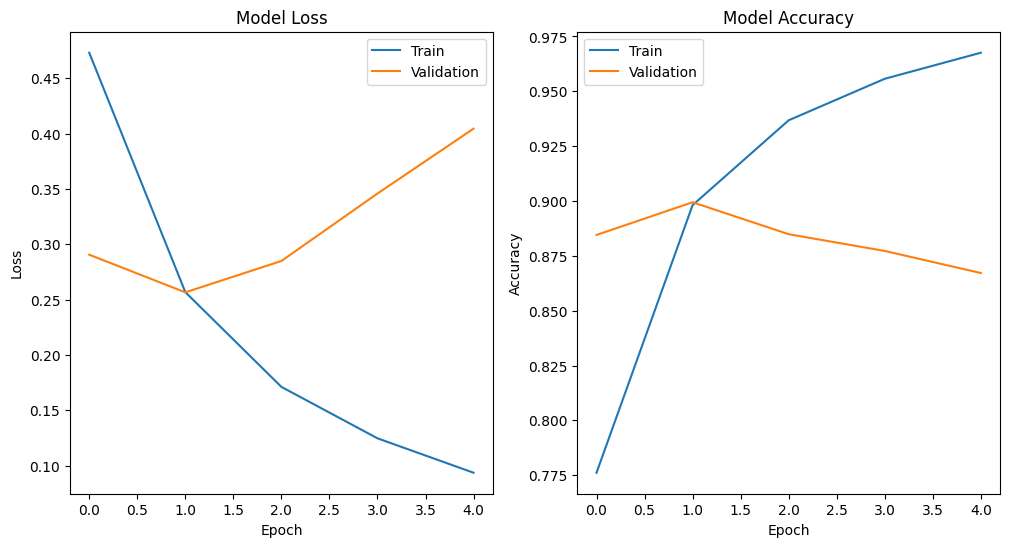

In [62]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()


Пример пользовательского predict

In [69]:
# Example new content
new_content = input('Введите комментарий: ').split()

# Tokenize and pad the new content
new_sequences = tokenizer.texts_to_sequences(new_content)
new_padded = pad_sequences(new_sequences, maxlen=100)

# Tokenize and pad the new content
new_sequences = tokenizer.texts_to_sequences(new_content)
new_padded = pad_sequences(new_sequences, maxlen=100)  # Ensure maxlen matches the training padding length

# Predict the probabilities
predictions = model.predict(new_padded)

print(predictions)



Введите комментарий:  хаю хай


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0.7793851]
 [0.7793851]]
